In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Softmax Regression

Softmax regression is a generalization of logistic regression to the case where we want to handle multiple classes (k  classes)

**Contents**

- [Softmax Regression](#1.-Softmax-Regression)
- [Example: The Iris Dataset](#2.-Example:-The-Iris-Dataset)
- [Example: The Palmer Archipelago Penguin Dataset](#3.-Example:-The-Palmer-Archipelago-Penguin-Dataset)
- [Example: Oranges, Lemons and Apples dataset](#4.-Example:-Oranges,-Lemons-and-Apples-dataset)

## 1. Softmax Regression

### The softmax function

In [4]:
def softmax(X,theta):
    m,n = X.shape
    Y = np.exp(X.dot(theta))
    row_sum = np.sum(Y,axis=1)[:,None]
    return Y/row_sum

In [5]:
# check that it works; notice that the entries of each row add to 1'
X = np.random.randn(5,3)
theta = np.random.randn(3,2)
softmax(X,theta)

array([[0.96604627, 0.03395373],
       [0.78327506, 0.21672494],
       [0.15710621, 0.84289379],
       [0.30707979, 0.69292021],
       [0.74063145, 0.25936855]])

### One-hot encoding

In [6]:
def one_hot_encoding(y):
    Y = np.zeros((len(y),len(np.unique(y))))
    Y[np.arange(len(y)),y] = 1
    return Y

In [7]:
# chekc that it works
y = np.array([0,1,1,3,4,2,2,0])
Y = one_hot_encoding(y)
Y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

### Softmax cost function

In [8]:
def softmax_cost(X,theta,y):
    m = X.shape[0]
    Y = one_hot_encoding(y)
    P = softmax(X,theta)
    return (-1/m)*np.sum(Y*np.log(P))

### Gradient Descent

In [9]:
def softmaxregression_GD(X,y,learning_rate,n_epochs, return_cost=False):
    
    m,n = X.shape
    k = len(np.unique(y))
        
    # initialize vector theta
    theta = np.random.randn(n,k)
    
    # initialize cost vector
    if return_cost:
        cost = np.zeros(n_epochs)
    
    # one-hot encoding
    Y = one_hot_encoding(y)
    
    # gradient descent iterations  
    for i in range(n_epochs):
        gradient = (1/m)*X.T.dot(softmax(X,theta)-Y)
        theta = theta - learning_rate * gradient
        if return_cost:
            cost[i] = softmax_cost(X,theta,y)
            
    # store results        
    results = {}
    results['theta'] = theta
    if return_cost:
        results['cost'] = cost
        
    return results

## 2. Example: The Iris Dataset

<img src="iris.png" alt="Drawing" style="width: 700px;"/>

The Iris flower data set is a data set introduced by the British statistician, and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.*

In [54]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
data = pd.read_csv(url)
data.head(5) #first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length.

In [55]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy()

In [57]:
# map classes to (0,1,2)
y = data.species.map({'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}).to_numpy()

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [59]:
# one hot encoding
Y = one_hot_encoding(y)

In [60]:
results = softmaxregression_GD(X,y,
                               learning_rate = 0.1,
                               n_epochs=1000,
                               return_cost=True)

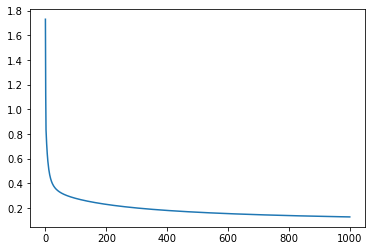

In [61]:
cost = results['cost']
plt.plot(cost)

In [62]:
theta = results['theta']

In [ ]:
P = softmax(X,theta)
np.round(P,3) #round entries of P to three decimals

In [64]:
def predictor_softmax(X,theta):
    P = softmax(X,theta)
    return np.argmax(P,axis=1)

In [65]:
y_pred = predictor_softmax(X,theta)

In [66]:
'Confusion matrix'
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j]=sum(y_pred[y==i]==j)
C

array([[50.,  0.,  0.],
       [ 0., 47.,  3.],
       [ 0.,  3., 47.]])

In [67]:
'percentage of incorrect classification'
100*np.sum(y_pred==y)/len(y)

96.0

## 3. Example: The Palmer Archipelago Penguin Dataset

<img src="cute_penguins.png" alt="Drawing" style="width: 500px;"/>

Art by @allison_horst

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

In [24]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/penguins_size.csv'
data = pd.read_csv(url)
data.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


This dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica

In [25]:
data.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

The culmen is the upper ridge of a bird’s bill. For this penguin data, the culmen (bill) length and depth are measured as shown below.

<img src="culmen_depth.png" alt="Drawing" style="width: 500px;"/>

Some rows contain missing values. We will drop them from the pandas dataframe.

In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
# map species to (0,1,2)
y = data.species.map({'Adelie': 0, 'Chinstrap' : 1, 'Gentoo' : 2}).to_numpy()

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
# one hot encoding
Y = one_hot_encoding(y)

In [31]:
# feature matrix
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

In [32]:
# scale the data
X = X/X.max(axis=0)

In [48]:
results = softmaxregression_GD(X,y,
                               learning_rate = 1,
                               n_epochs=5000,
                               return_cost=True)

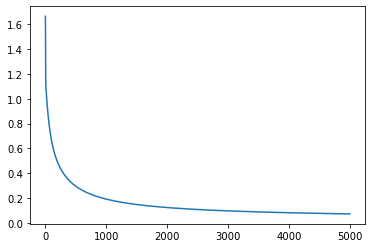

In [49]:
cost = results['cost']
plt.plot(cost)

In [50]:
theta = results['theta']

In [51]:
y_pred = predictor_softmax(X,theta)

In [52]:
'Confusion matrix'
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j]=sum(y_pred[y==i]==j)
C

array([[146.,   0.,   0.],
       [  3.,  65.,   0.],
       [  0.,   0., 120.]])

In [53]:
'percentage of incorrect classification'
100*np.sum(y_pred==y)/len(y)

99.10179640718563

## 4. Example: Oranges, Lemons and Apples dataset

<img src="fruits.png" alt="Drawing" style="width: 500px;"/>

The dataset *fruits.csv* contains measurements of the height (cm), width (cm) and mass (g) of a selection of oranges, lemons and apples.

In [ ]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fruits.csv'
data = pd.read_csv(url)
data

In [118]:
X = data[['height', 'width', 'mass']].to_numpy()

In [119]:
# scale the data
X = X/X.max(axis=0)

In [120]:
y =  data.fruit.map({
   'apple' : 0,
    'orange' : 1,
    'lemon' : 2
}).to_numpy()

In [121]:
y

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [128]:
results = softmaxregression_GD(X,y,
                               learning_rate = 3,
                               n_epochs=5000,
                               return_cost=True)

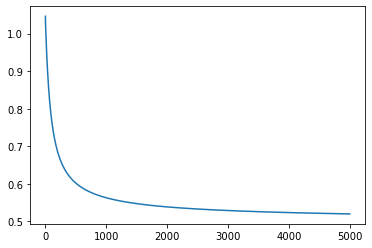

In [129]:
cost = results['cost']
plt.plot(cost)

In [130]:
theta = results['theta']

In [131]:
y_pred = predictor_softmax(X,theta)

In [132]:
'Confusion matrix'
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j]=sum(y_pred[y==i]==j)
C

array([[ 0., 19.,  0.],
       [ 5., 19.,  0.],
       [ 0.,  0., 16.]])

In [133]:
'percentage of incorrect classification'
100*np.sum(y_pred==y)/len(y)

59.32203389830509